In [1]:
from fastai.vision import *

In [2]:
classes=['pikatu','raichu']

In [3]:
folder="pikatu"
file='pika.txt'

In [4]:
path=Path('data/pokemon')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
path.ls()

[WindowsPath('data/pokemon/pika.txt'),
 WindowsPath('data/pokemon/pikatu'),
 WindowsPath('data/pokemon/raichu'),
 WindowsPath('data/pokemon/raichu.txt')]

In [6]:
download_images(path/file, dest, max_pics=50, max_workers=0)

In [7]:
folder="raichu"
file='raichu.txt'

In [8]:
path=Path('data/pokemon')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
path.ls()

[WindowsPath('data/pokemon/pika.txt'),
 WindowsPath('data/pokemon/pikatu'),
 WindowsPath('data/pokemon/raichu'),
 WindowsPath('data/pokemon/raichu.txt')]

In [10]:
download_images(path/file, dest, max_pics=50, max_workers=0)

In [11]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

pikatu


raichu


In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0, bs=2).normalize(imagenet_stats)

In [19]:
data.classes


['pikatu', 'raichu']

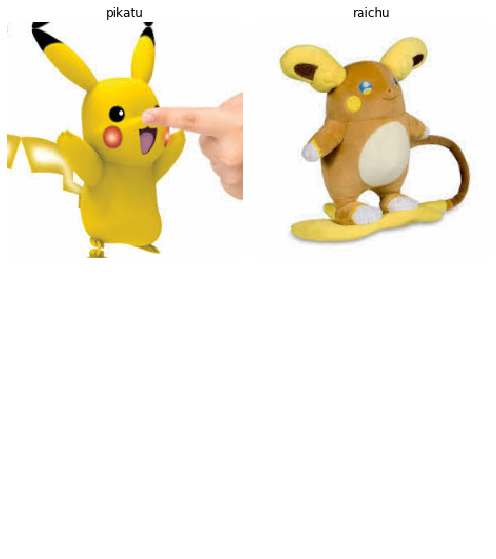

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['pikatu', 'raichu'], 2, 45, 11)

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\Elnino/.cache\torch\checkpoints\resnet34-333f7ec4.pth


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.141656,0.343536,0.181818,00:32
1,0.980538,0.208998,0.090909,00:32
2,0.878586,0.414083,0.272727,00:32
3,0.757111,0.311883,0.090909,00:32


In [24]:
learn.save('stage-1')

In [25]:
learn.unfreeze()

In [26]:

learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


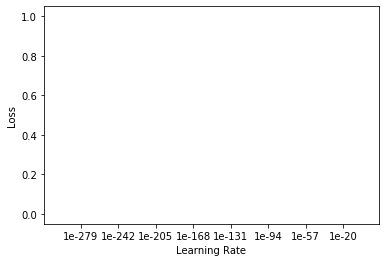

In [27]:
learn.recorder.plot()

In [28]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


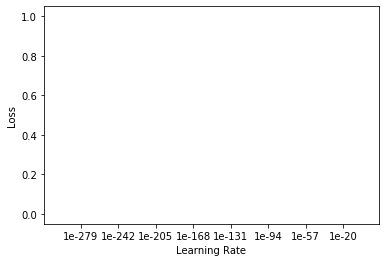

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.746437,0.275917,0.090909,00:46
1,0.915268,0.186791,0.000000,00:43


In [31]:

learn.save('stage-2')

In [32]:
learn.load('stage-2');

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

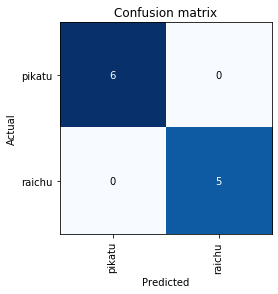

In [34]:
interp.plot_confusion_matrix()

In [35]:
from fastai.widgets import *

In [46]:

db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

SyntaxError: invalid syntax (<ipython-input-46-fa9a4afd1cb0>, line 5)

In [45]:
db.train_dl.batch_size

64

In [49]:
db.batch_size = 2

In [50]:
db.train_dl.batch_size

2

In [51]:

learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [52]:
learn_cln.load('stage-2');

In [53]:

ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [54]:

ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [55]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [56]:
learn.export()

In [57]:
defaults.device = torch.device('cpu')

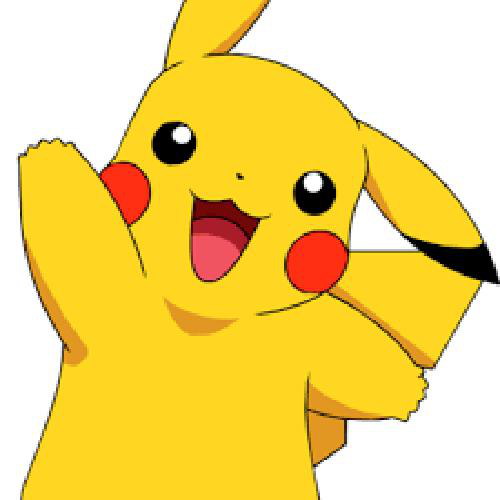

In [58]:
img = open_image(path/'pikatu'/'00000021.jpg')
img


In [59]:
learn = load_learner(path)

In [60]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'pikatu'